In [1]:
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np
import math
import string
import random
from cmath import sqrt
%matplotlib widget

# ejercicio 2
dipercia me dijo q hagamos una animacion de los bichitos en cada tiempo osea iteracion

In [2]:
def func_1 (x):
    f_x = -x* math.sin(math.sqrt(abs(x)))
    return f_x

In [3]:
def func_2 (x):
    f_x = x + 5*math.sin(3*x) + 8*math.cos(5*x)
    return f_x

In [4]:
def func_3 (x, y):
    a = x ** 2 + y ** 2
    f_x = np.power(a, 0.25) * (np.sin(50 * np.power(a, 0.1)) ** 2  + 1)
    return f_x

In [5]:
def actualizar_mejores (f,k,x,yk,yk_global,f_v,counter):
    #pregunto si tiene 1 o 2 dimensiones
    if(f==func_3):
        f_v.append(f(x[k][0],x[k][1]))
        #actualizacion de posiciones mejores
        if(f(x[k][0],x[k][1]) < f(yk[k][0],yk[k][1])):
            yk[k]=x[k]
        if(f(yk[k][0],yk[k][1]) < f(yk_global[0],yk_global[1])):
            yk_global=yk[k]
            counter=0
    else:
        f_v.append(f(x[k]))
        #actualizacion de posiciones mejores
        if(f(x[k]) < f(yk[k])):
            yk[k]=x[k]
        if(f(yk[k]) < f(yk_global)):
            yk_global=yk[k]
            counter=0
    return yk,yk_global,counter

In [6]:
def limitador (f,x,k,lim_inf,lim_sup):
    #pregunto si tiene 1 o 2 dimenciones
    if(f==func_3):
        #limitador en x
        if(x[k][0] < lim_inf):
            x[k][0] = lim_inf
        if(x[k][0] > lim_sup):
            x[k][0] = lim_sup
        #limitador en y
        if(x[k][1] < lim_inf):
            x[k][1] = lim_inf
        if(x[k][1] > lim_sup):
            x[k][1] = lim_sup
    else:
        if(x[k] < lim_inf):
            x[k] = lim_inf
        if(x[k] > lim_sup):
            x[k] = lim_sup
    return x

In [7]:
def alg_enjambre (particulas,lim_inf,lim_sup,f,c1,c2):
    
    if(f==func_3):
        x=np.random.uniform(lim_inf,lim_sup,(particulas,2)) #entradas
        v=np.zeros((x.shape[0],2)) #vector de velociedades
    else:
        x=np.random.uniform(lim_inf,lim_sup,particulas) #entradas
        v=np.zeros((x.shape[0],1)) #vector de velociedades
    #mejor posicion personal
    yk=np.copy(x)
    yk_global=yk[0] #mejor posicion global
    counter=0
    # print(v)
    # variables para animacion
    anim_x=[] 
    anim_y=[]
    while (counter!=16):
        # print(counter)
        f_v = []
        for k in range(particulas):
            # print(f'particula [{k}] f[x] = {f(x[k][0],x[k][1])} ,  f[yk] = {f(yk[k][0],yk[k][1])}  fk_globabl= {f(yk_global[0],yk_global[1])}')
            # print(f'particula [{k}] f[x] = {f(x[k])} ,  f[yk] = {f(yk[k])}  fk_globabl= {f(yk_global)}')
            yk,yk_global,counter=actualizar_mejores (f,k,x,yk,yk_global,f_v,counter)

        anim_x.append(x)
        anim_y.append(f_v)
        for k in range(particulas):
            #variables aleatorias
            r_1 = np.random.rand(x.ndim)
            r_2 = np.random.rand(x.ndim)
            #actualizacion de la velocidad
            v_next = v[k] + (c1*r_1)*(yk[k]-x[k]) + (c2*r_2)*(yk_global-x[k])
            # print(v_next,v[k])
            v[k] = v_next
            # if(c1!=0.1):
            #     c1=c1-0.01
            # if(c2!=1):
            #     c2=c2+0.01
            #actualizacion de la posicion
            x[k]=x[k]+v[k]
            x=limitador (f,x,k,lim_inf,lim_sup)
            # print(f'9  particula [{k}] f[yk] = {f(yk[k])}')
        counter= counter + 1
    return yk_global,anim_x,anim_y
          
    

In [8]:
winner,anim_x,anim_y = alg_enjambre(10,-512,512,func_1,0.1,0.1)
print(len(anim_x))
print(func_1(winner))

39
-418.97696939757935


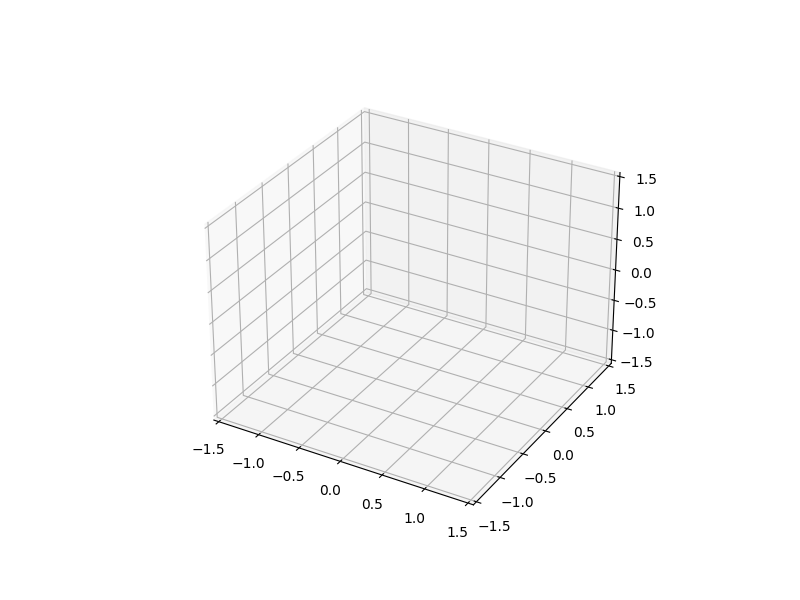

In [17]:

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

num_of_points = 7
num_of_frames = 50

t=np.linspace(0, 2*np.pi, num_of_frames, endpoint=False)[:, None] + np.linspace(0, 2*np.pi, num_of_points, endpoint=False)[None, :]
x=np.cos(t)
y=np.sin(t)
z=np.sin(t)*np.cos(t)

points, = ax.plot([], [], [], 'o')


def update_points(n):
    points.set_data(np.array([x[n, :], y[n, :]]))
    points.set_3d_properties(z[n, :], 'z')
    return points,

ax.set_xlim([-1.5, 1.5])
ax.set_ylim([-1.5, 1.5])
ax.set_zlim([-1.5, 1.5])


ani=FuncAnimation(fig, update_points, num_of_frames, interval=10, blit=True, repeat=True)
plt.show()

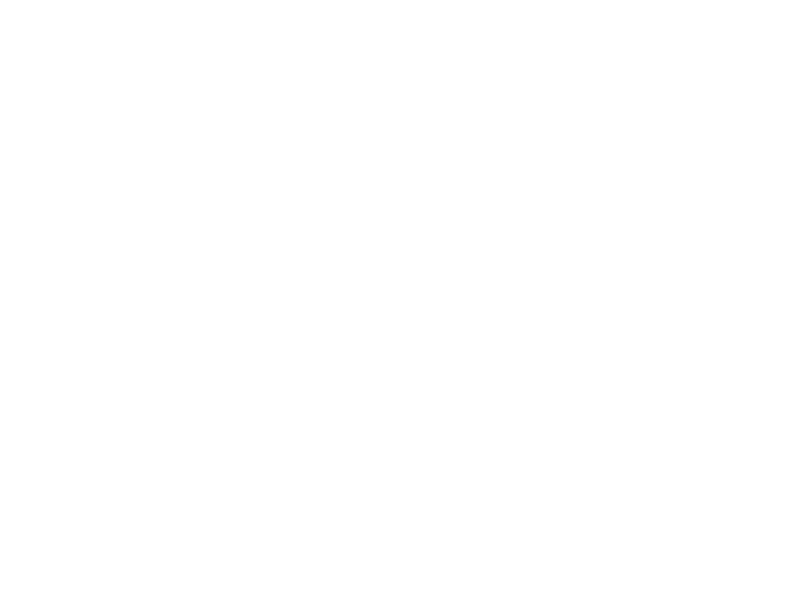

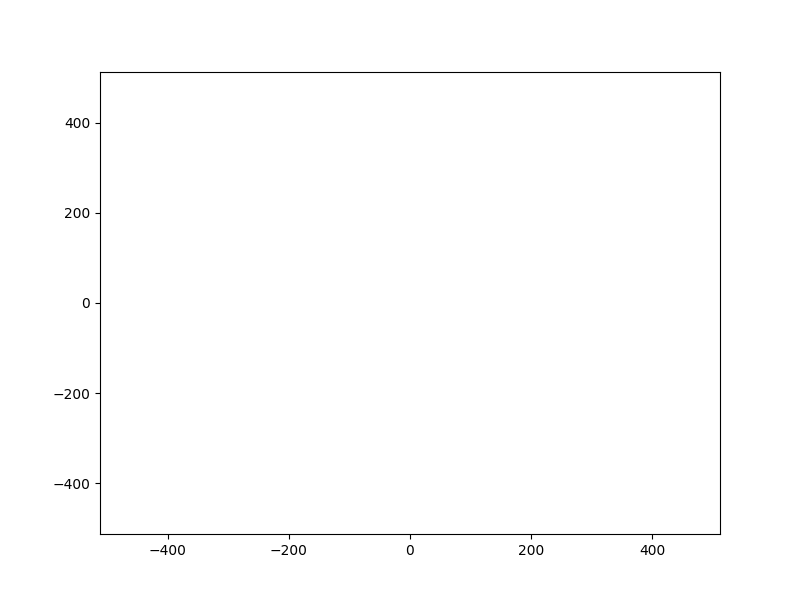

In [10]:
fig = plt.figure()
ax = plt.axes(xlim=(-512, 512), ylim=(-512, 512))
dot, = ax.plot([], [], lw=2)

def init():
    dot.set_data([], [])
    return dot,

fig = plt.figure()
def animate(i):
    x=anim_x[i]
    y=anim_y[i]
    dot.set_data(x,y)
    return dot

ani = FuncAnimation(fig,update,
      fargs=(phi_offs, offset_xs, offset_ys), 
      interval = 2, 
      frames=np.linspace(0,2*np.pi,360, endpoint=False),
      blit=True)


plt.show()
    

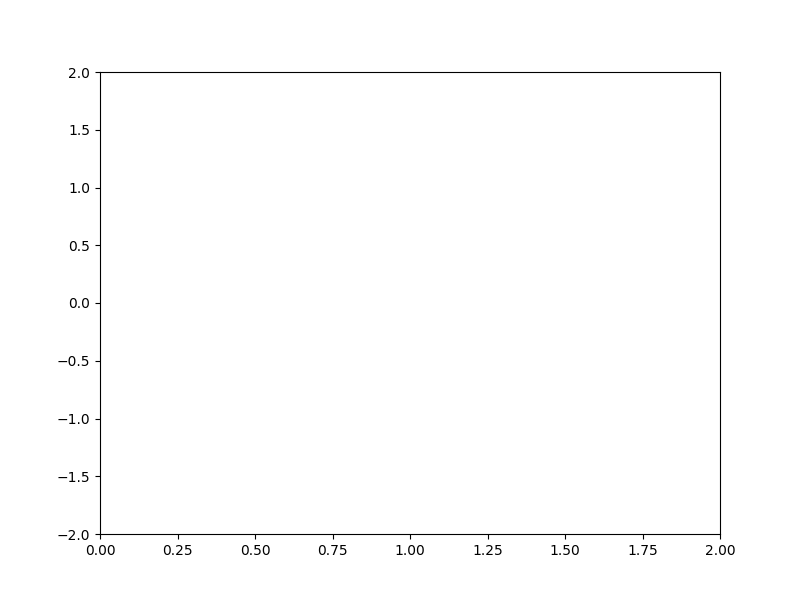

In [11]:
fig = plt.figure()
ax = plt.axes(xlim=(0, 2), ylim=(-2, 2))
line, = ax.plot([], [], lw=2)


def init():
    line.set_data([], [])
    return line,


def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return line,

anim = FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=20, blit=True)


plt.show()

In [12]:
winner,anim_x,anim_y = alg_enjambre(7,0,20,func_2,1.2,1)
print(func_2(winner))

-9.431379264159832


-9.352864532857351


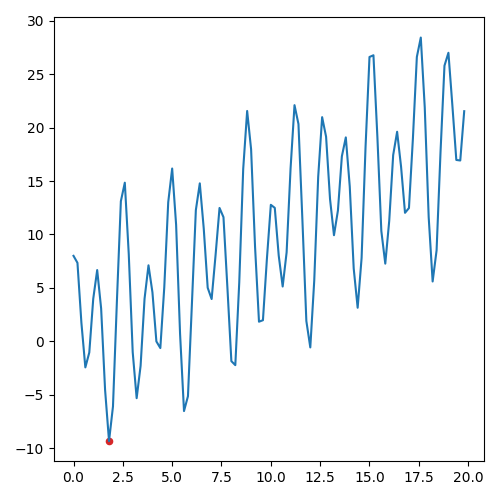

In [13]:
anim_fig = plt.figure(figsize=(5, 5), tight_layout=True)
x=np.arange(0,20,0.2)
y=[]
for i in x:
    y.append(func_2(i))
min=np.argmin(y)
plt.scatter(x[min],y[min],s=20,c='C3')
plt.plot(x,y)
print(y[min])
plt.show()

In [14]:
winner,anim_x,anim_y = alg_enjambre(400,-100,100,func_3,0.05,0.01)
print(winner[0],winner[1],func_3(winner[0],winner[1]))
print(func_3(winner[0],winner[1]))

-0.054010632750042475 0.0184897623981235 0.24018123337470518
0.24018123337470518


0.0


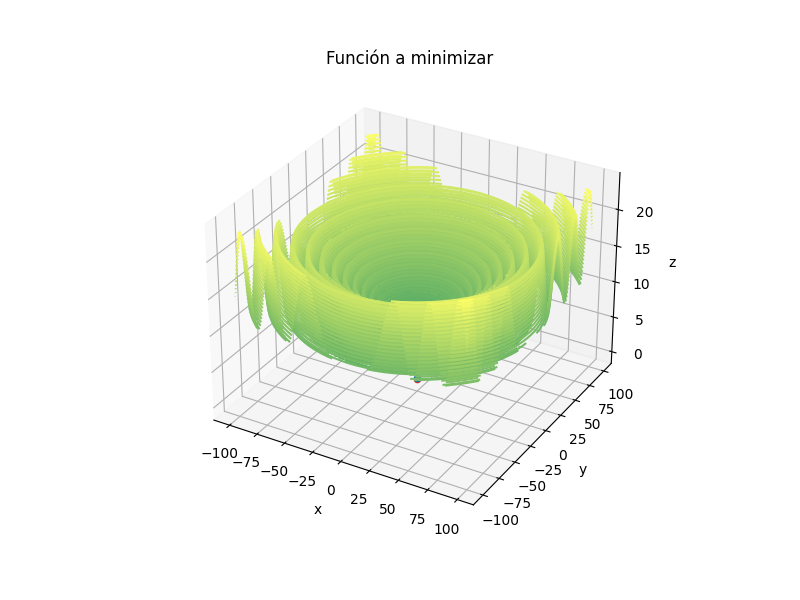

In [15]:
%matplotlib widget
x = np.arange(-100, 100, 1)
y = np.arange(-100, 100, 1)

X, Y = np.meshgrid(x, y)
Z = func_3(X, Y)
z=[]
for i in range(x.shape[0]):
    z.append(func_3(x[i],y[i]))

min=np.argmin(z)
print(z[min])

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='summer')
ax.scatter(x[min],y[min],z[min],c='C3')
ax.scatter(winner[0],winner[1],func_3(winner[0],winner[1]))
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Función a minimizar')
plt.show()